In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from Trainer import Trainer

from WaveDataset import WaveDataset

from torch.utils.data.dataloader import DataLoader

In [16]:
from Trainer import Trainer
from WaveModel import WaveModel
# block_size = 512

mydataset = WaveDataset('10k_1orig',max_length=180,max_mics=6)
# automatically take correct number of mic for model
max_length,mic_num,source_num = mydataset.get_config()

model = WaveModel(mic_num=mic_num,source_num=source_num,
tot_timesteps=max_length,
n_embd=80,n_hidden=120,
n_head=8,n_layer=4,dropout=0.1)
device = 'cuda'
m=model.to(device)
train=Trainer(model,mydataset,run_name = 'TestRun',
              batch_size=128,device=device)
train.to(device)

print('device : ', device)

Initialized dataset with 10000 examples


TypeError: WaveModel.__init__() got an unexpected keyword argument 'run_name'

In [ ]:
train.model.train()
train.optimization(epochs=100,eval_interval=2,lr=1e-3,loadingbar=False)

In [14]:
train.save_weights()

torch.Size([3, 6, 180])

torch.Size([3, 6, 180])


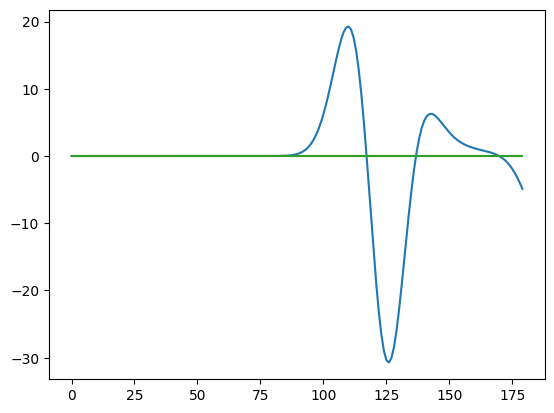

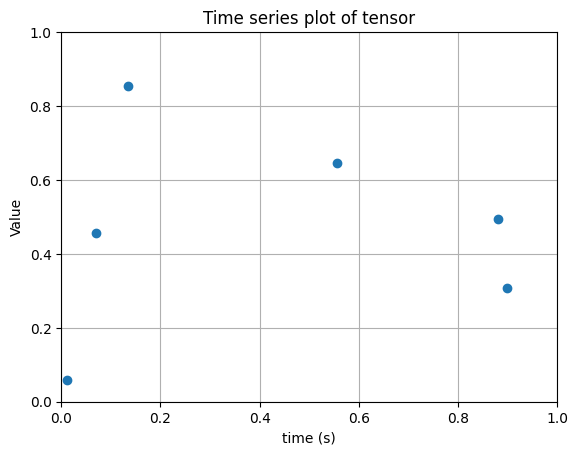

In [15]:
# Visualize microphone recordings.
num=3
recordings = mydataset[num][0] # (3,M,T)
print(recordings.shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(3):
    mic_recording = recordings[0,i,:].numpy()

    x = range(len(mic_recording))
    ax.plot(x, mic_recording)

fig, ax = plt.subplots()

plt.scatter(recordings[1,:,0],recordings[2,:,0])
plt.xlim([0, 1])  # setting x limit
plt.ylim([0, 1])  # setting y limit

ax.set(xlabel='time (s)', ylabel='Value', title='Time series plot of tensor')
ax.grid()
plt.show()